# Weather Time Series Analysis and Forecast
### Reykjavik, iceland
Esmaail Albarazi 2017281413
#
An Nguyen


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Set the style of seaborn for better looking plots
sns.set()

In [46]:
num_years  = 1

import data

In [47]:
ts = pd.read_csv('Reykjavik.csv')
ts

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1/1/40,73,2.2,-1.7,0.3,-3.2,-6.8,-4.8,1940-01-01T11:18,1940-01-01T15:42,...,NaN,NaN,NaN,NaN,11,22.3,NaN,73,NaN,NaN
1,1/2/40,73,1.0,-0.4,0.3,-4.0,-5.9,-4.9,1940-01-02T11:17,1940-01-02T15:44,...,0.00,3.7,0.1,2.52,23,19.8,39.6,77,0.09,0.44
2,1/3/40,73,4.0,-0.4,1.9,1.2,-6.3,-3.1,1940-01-03T11:16,1940-01-03T15:46,...,0.00,5.0,1.2,2.66,16,30.0,54.0,102,0.10,0.27
3,1/4/40,53,5.4,1.5,2.5,1.5,-2.1,-1.3,1940-01-04T11:15,1940-01-04T15:48,...,828.68,2.1,2.1,0.00,12,21.1,27.7,150,0.20,0.02
4,1/5/40,55,6.5,4.6,5.6,1.8,0.2,1.2,1940-01-05T11:13,1940-01-05T15:50,...,0.00,5.5,5.5,0.00,11,29.9,52.9,148,0.16,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30950,9/26/24,3,5.1,-1.1,2.4,2.2,-4.2,-0.5,2024-09-26T07:23,2024-09-26T19:12,...,13904.13,0.0,0.0,0.00,0,9.4,20.2,318,5.18,0.60
30951,9/27/24,51,7.2,3.6,5.2,5.1,1.2,3.1,2024-09-27T07:26,2024-09-27T19:09,...,4209.56,1.1,1.1,0.00,11,11.8,21.2,92,4.15,0.56
30952,9/28/24,53,5.9,3.8,5.0,2.7,-0.1,1.4,2024-09-28T07:29,2024-09-28T19:05,...,0.00,4.2,4.2,0.00,16,16.8,31.7,103,1.70,0.45
30953,9/29/24,53,8.0,2.1,5.3,6.1,-1.6,2.1,2024-09-29T07:32,2024-09-29T19:02,...,7455.96,4.4,4.4,0.00,13,17.3,32.4,66,3.90,0.52


In [48]:
temp_mean = ts['temperature_2m_mean (°C)']
t = ts['time']

for some reason pd.to_datetime function was mixing between 1900s and 2000s, so it was doing 2040 instead of 1940 

so i had to do this thingy that adds 1900 to the year number in the date string if from before 2000 and 2000 if after

In [49]:
t_90s= [t[i][:-2]+str(1900+ int(t[i][-2:])) for i in range(365*60+14)]
t_20s= [t[i][:-2]+str(2000+ int(t[i][-2:])) for i in range(365*60+15,len(t))]
t = t_90s + t_20s

In [50]:
t = pd.to_datetime(t, format='mixed')

In [51]:
t[-1],t[0]

(Timestamp('2024-09-30 00:00:00'), Timestamp('1940-01-01 00:00:00'))

/tmp/ipykernel_28081/1974763881.py:7: RankWarning: Polyfit may be poorly conditioned
  coefs=np.polyfit(range(365*num_years),temp_mean[:365*num_years],20)


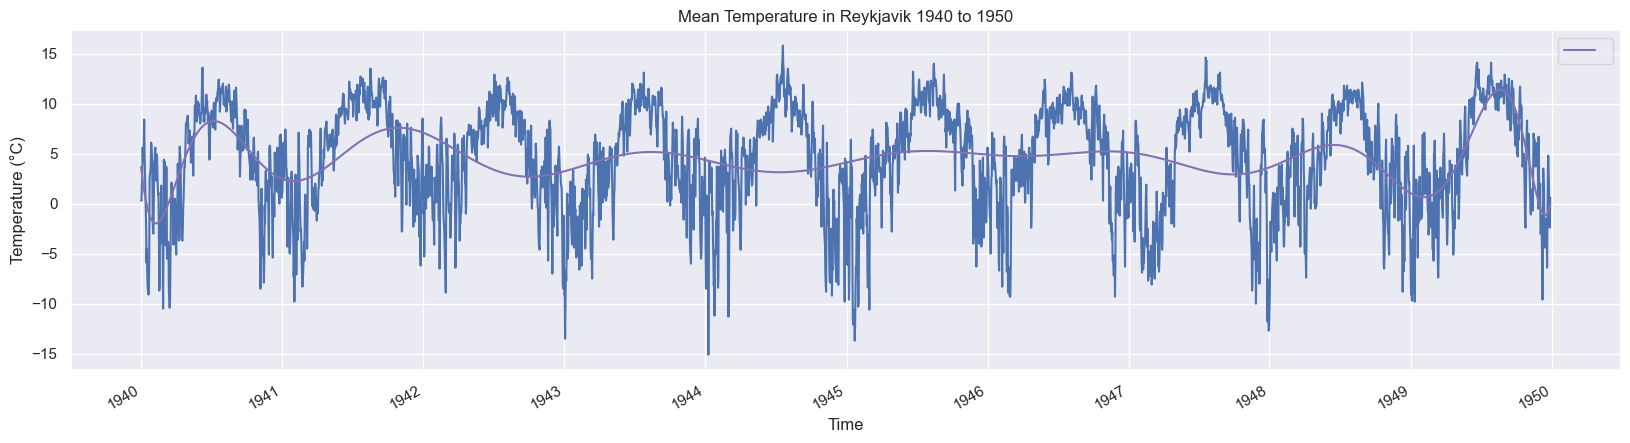

In [64]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Plot mean temperature in Reykjavik
ax.plot(t[:365*num_years], temp_mean[:365*num_years])

coefs=np.polyfit(range(365*num_years),temp_mean[:365*num_years],20)
quadTS = pd.Series(np.polyval(coefs,range(365*num_years)),index=t[:365*num_years])

quadTS.plot(ax=ax,legend=True,color='m')
# Set the title and labels
ax.set_title('Mean Temperature in Reykjavik 1940 to '+str(1940 + num_years))
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')

# Show the plot
plt.show()

we can transform the time serie to frequency insread of time (years -> cucles per year) so it's better visualized the trend per year


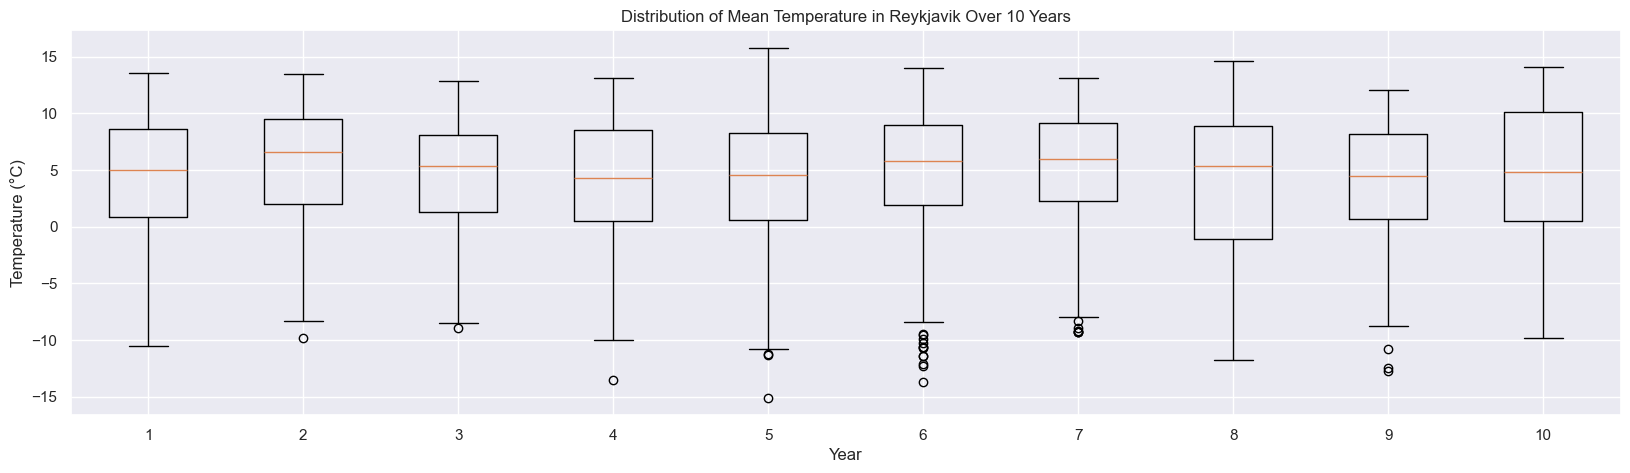

In [53]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Assuming `temp_mean` is split into daily temperatures for each year
ax.boxplot([temp_mean[365*i:365*(i+1)] for i in range(num_years)])
# Set the title and labels
ax.set_title('Distribution of Mean Temperature in Reykjavik Over '+str(num_years)+' Years')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')

# Show the plot
plt.show()


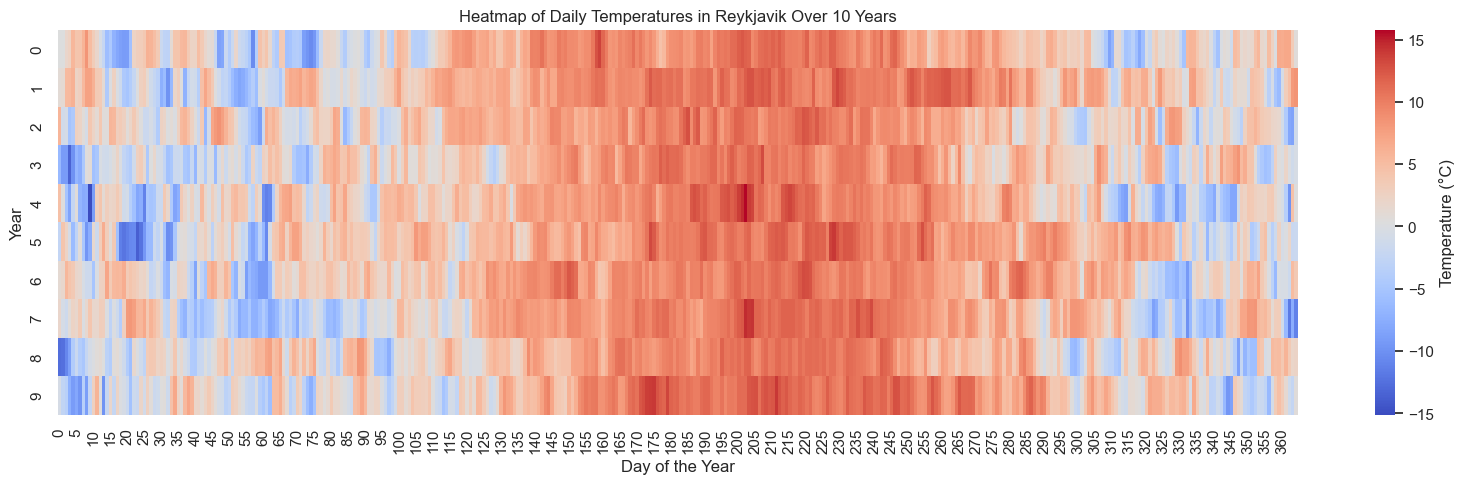

In [54]:

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Reshape the temperature data to 365 days for several years
data = np.reshape(temp_mean[:365*num_years], (num_years, 365))

# Plot heatmap using seaborn
sns.heatmap(data, ax=ax, cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'})

# Set the title and labels
ax.set_title('Heatmap of Daily Temperatures in Reykjavik Over 10 Years')
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Year')

# Show the plot
plt.show()


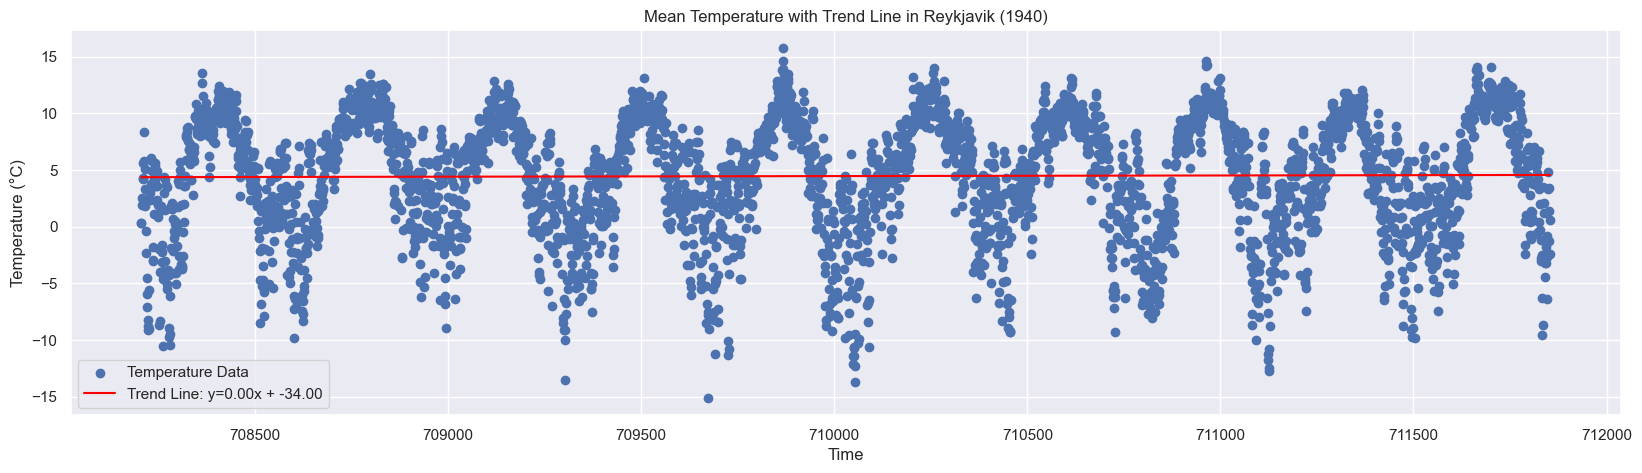

In [55]:
from scipy import stats

t_numeric = t.map(lambda date: date.toordinal())

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Scatter plot of temperatures over time
ax.scatter(t_numeric[:365*num_years], temp_mean[:365*num_years], label='Temperature Data')

# Fit a trend line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(t_numeric[:365*num_years], temp_mean[:365*num_years])
ax.plot(t_numeric[:365*num_years], intercept + slope * np.array(t_numeric[:365*num_years]), color='red', label=f'Trend Line: y={slope:.2f}x + {intercept:.2f}')

# Set the title and labels
ax.set_title('Mean Temperature with Trend Line in Reykjavik (1940)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.legend()

# Show the plot
plt.show()
